In [26]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# 1. Read in data set, explore

In [27]:
# Load the processed data

df_med = pd.read_csv('../med_data1.csv')

In [28]:
df_med.head(3)

,ID,Customer_id,Interaction,UID,zip,Lat,Lng,City,State,Population,County,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,fav_color,Credit_card,ReAdmin,Gender,SeniorCitizen,Initial_Admin,HighBlood,Stroke,Complication_Risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_Days,MonthlyCharge,TotalCharge,item1,item2,item3,item4,item5,item6,item7,item8
0,1,C412403,cd86e3b5-bccb-4c38-b406-a70859af6424,1b827d78c02cdf967d83280a316fbab7,19610,40.34008,-75.97606,Reading,PA,15439,Berks,Suburban,America/New_York,"Production assistant, radio",1,79,Regular High School Diploma,Student,83147.66,Divorced,Snow,Discover,No,Female,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,95.018175,1034.377162,0,1,0,4,1,2,2,4
1,2,Z919181,7058d104-99d4-41ae-ad17-def063f2024c,e3d31d932fe4468908664f2b054fa31c,66080,38.40441,-95.25956,Richmond,KS,922,Franklin,Urban,America/Chicago,Retail buyer,2,31,"Some College, 1 or More Years, No Degree",Full Time,54612.56,Divorced,PaleGoldenRod,Mastercard,Yes,Male,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,97.442069,1497.764653,3,4,3,3,2,4,1,3
2,3,F995323,4c1a465a-2a2b-4f38-bbe6-036fac234eaa,2644b097b08b5548313266f100a6e22c,45653,38.89156,-82.82310,Minford,OH,3782,Scioto,Urban,America/New_York,Forensic scientist,7,49,"Some College, 1 or More Years, No Degree",Student,7726.42,Married,WhiteSmoke,VISA 16 digit,Yes,Male,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,82.496547,395.125825,3,1,2,3,2,2,3,4


In [29]:
#df_med.describe()
#df_med.dtypes

In [30]:
X = df_med.copy()
print(X.shape)

(10000, 50)


# 2. Feature Engineering

## Variable transformation 

In [31]:
# transform zip to categorical

X['zip']= X['zip'].astype('str')

## Variable selection

### Continuous variables

In [32]:
# Cont cols (normalize for KNN)

# Continuous cols (normalize-for KNN)
cols_cont = ['Population', 'Children', 'Lat', 'Lng', 'Income', 'Age', 'Initial_Days', 'TotalCharge'] #leave out monthlycharge
X_cont = X[cols_cont]
X_cont.head(3)

,Population,Children,Lat,Lng,Income,Age,Initial_Days,TotalCharge
0,15439,1,40.34008,-75.97606,83147.66,79,10.585770,1034.377162
1,922,2,38.40441,-95.25956,54612.56,31,15.129562,1497.764653
2,3782,7,38.89156,-82.82310,7726.42,49,4.772177,395.125825


### Categorical variables

In [33]:
# Cat cols-full list

cols_cat_all = X.loc[:, X.dtypes == np.object].columns.values.tolist() #have to translate back to list format
cols_cat_all = cols_cat_all[3:] #remove the first three cols, related to cust ID


In [34]:
# Cat cols-only those with limited tot unique value (otherwise too many categories created for dummies)

t = X[cols_cat_all].nunique().sort_values(ascending=False)
t = t.loc[lambda t: t < 20]  # change value to what is desired here, from 20
cols_cat_all_red = t.index.values.tolist()
X[cols_cat_all_red].nunique().to_frame('tot unique') #updated reduced list 


,tot unique
Education,12
Credit_card,10
Employment,5
Marital,5
Services,4
Area,3
Complication_Risk,3
Initial_Admin,3
HighBlood,2
Hyperlipidemia,2


In [35]:
# 1. Create dummies-for categorical cols (use reduced col list)

X_cat_red = pd.get_dummies(X[cols_cat_all_red], drop_first=True) # drop first as it is redundant
print('number of cat cols chosen: ', X[cols_cat_all_red].shape[1])
print('total cat cols after one hot encoding: ', X_cat_red.shape[1])
X_cat_red.head(3)

number of cat cols chosen:  22
total cat cols after one hot encoding:  51


,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate Degree,Education_GED or Alternative Credential,Education_Master's Degree,Education_No Schooling Completed,Education_Nursery School to 8th Grade,Education_Professional School Degree,Education_Regular High School Diploma,"Education_Some College, 1 or More Years, No Degree","Education_Some College, Less than 1 Year",Credit_card_Diners Club / Carte Blanche,Credit_card_Discover,Credit_card_JCB 15 digit,Credit_card_JCB 16 digit,Credit_card_Maestro,Credit_card_Mastercard,Credit_card_VISA 13 digit,Credit_card_VISA 16 digit,Credit_card_Voyager,Employment_Part Time,Employment_Retired,Employment_Student,Employment_Unemployed,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Services_CT Scan,Services_Intravenous,Services_MRI,Area_Suburban,Area_Urban,Complication_Risk_Low,Complication_Risk_Medium,Initial_Admin_Emergency Admission,Initial_Admin_Observation Admission,HighBlood_Yes,Hyperlipidemia_Yes,Reflux_esophagitis_Yes,Allergic_rhinitis_Yes,Anxiety_Yes,BackPain_Yes,Arthritis_Yes,Diabetes_Yes,Overweight_Yes,Stroke_Yes,ReAdmin_Yes,Gender_Male,Asthma_Yes,SeniorCitizen_Yes
0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0


In [36]:
# 2. Label encode-all categorical cols

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

X_cat_all = X[cols_cat_all].apply(le.fit_transform)
print('number of cat cols (all): ', X[cols_cat_all].shape[1])
print('total cat cols (all) after one hot encoding: ', X_cat_all.shape[1])
X_cat_all.head(3) 

number of cat cols (all):  29
total cat cols (all) after one hot encoding:  29


,zip,City,State,County,Area,Timezone,Job,Education,Employment,Marital,fav_color,Credit_card,ReAdmin,Gender,SeniorCitizen,Initial_Admin,HighBlood,Stroke,Complication_Risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
0,988,4505,38,122,1,15,459,9,3,0,126,2,0,0,0,1,1,0,2,0,1,1,0,1,1,1,0,1,0
1,5768,4564,16,524,2,2,514,10,0,0,102,6,1,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,2
2,3471,3490,35,1313,2,15,259,10,3,1,137,8,1,1,0,0,1,0,2,1,0,1,0,0,0,0,0,0,0


In [37]:
# Join Cat and Noncat together

X_all_ind = pd.concat([X_cont, X_cat_red],axis=1)
X_all = pd.concat([X_cont, X_cat_all],axis=1)

print('total cols for final df, one hot eoncded cat cols: ', X_all_ind.shape[1]) 
print('total cols for final df, all cat cols: ',X_all.shape[1])
#X_all.head()

total cols for final df, one hot eoncded cat cols:  59
total cols for final df, all cat cols:  37


In [38]:
# Market Basket Set

cols_MB = ['HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']

X_MB = X[cols_MB].apply(le.fit_transform) #label encode (to transform yes/no to 0/1)
print('number of cat cols in MB: ', X[cols_MB].shape[1])
print('total cat cols in MB after one hot encoding: ', X_MB.shape[1])
X_MB.head(3) 

number of cat cols in MB:  11
total cat cols in MB after one hot encoding:  11


,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma
0,1,0,0,1,1,0,1,1,1,0,1
1,1,0,1,0,0,0,0,0,0,1,0
2,1,0,1,0,1,0,0,0,0,0,0


# Unspervised Modeling Techniques

# 1. PCA

This section covers PCA Analysis

In [39]:
from sklearn.preprocessing import MinMaxScaler

# Standardize the continous col before PCA

scaler = MinMaxScaler()
X_cont_std = scaler.fit_transform(X_cont)

### Run twice, 2nd time after you determine # components (below)

In [40]:
# Fit PCA model (for specific cum variance)

from sklearn.decomposition import PCA

# use these for % threshold
# percent=.85
# pca = PCA(n_components=percent)

# use this for all components (first run)
pca = PCA()

pca.fit(X_cont_std)
X_pca = pca.transform(X_cont_std)

print("original cols:   ", X_cont.shape[1])
print("prin comp cols:", X_pca.shape[1])

original cols:    8
prin comp cols: 8


In [41]:
print('Number of components: ', pca.n_components_)
print('% explained variance: ', sum(pca.explained_variance_ratio_))

Number of components:  8
% explained variance:  1.0000000000000002


In [42]:
# Print principle components 

print('Explained Variance Ratio')
for i in range(pca.n_components_):
    print('PC{}: {}'.format(i+1,pca.explained_variance_ratio_[i]))

Explained Variance Ratio
PC1: 0.5405025166450581
PC2: 0.2040805927152423
PC3: 0.11308602279034138
PC4: 0.05122485334250952
PC5: 0.03600979102290613
PC6: 0.03125034864208857
PC7: 0.02158494941923733
PC8: 0.0022609254226168157


## Scree plot (choose number of components)

Text(0.8, 0.85, '95% cut-off threshold')

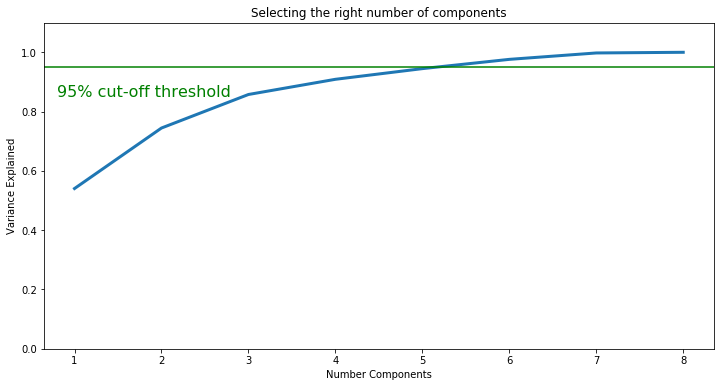

In [43]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,6)
pca = PCA()
pca.fit(X_cont_std)

cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.arange(len(cumsum))+1

plt.plot(dim,cumsum,'-',lw=3);

plt.xlabel('Number Components')
plt.ylabel('Variance Explained')
plt.title('Selecting the right number of components')

plt.xticks([1,2,3,4,5,6,7,8])
plt.ylim([0,1.1]);

# add horizontal cuoff line, @ 95%
plt.axhline(y=0.95, color='g', linestyle='-')
plt.text(0.8,.85, '95% cut-off threshold', color = 'green', fontsize=16)




# 2. Clustering

This section covers clustering

## Kmeans clustering

In [79]:
# Kmeans on X cont cols + one hot encoded categorical cols (i.e., X_all_ind)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_all_ind)
y_kmeans = kmeans.predict(X_all_ind) #predict cluster for each observation

In [80]:
# This prints the cluster labels of each data point (total 1000)

print(kmeans.labels_) #alt to y_kmeans

[3 2 0 ... 0 0 0]


## Choose number of clusters-Silhouette and Scree (Extra)

### 1. Inertia

Based on Within-Cluster-Sum-of-Squares (WCSS)

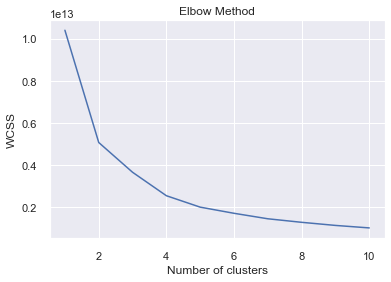

In [81]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X_all_ind)
    wcss.append(kmeans.inertia_)

#plt.figure(figsize=(10,10))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## 2. Silhouette

Based on max silhouette score

In [ ]:
from sklearn.metrics import silhouette_score

# a value between [-1, 1], with 1 being best, -1 worst (0 means there are overlapping clusters)

print(silhouette_score(X_all_ind, kmeans.labels_))

/Users/joehaber/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


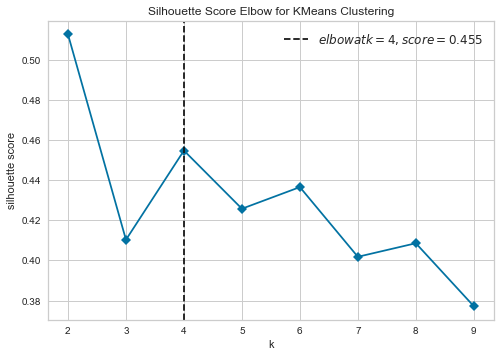

In [47]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X_all_ind)    
visualizer.poof() 

## Fit kmeans on PCA components-for visualization (Extra)

/Users/joehaber/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


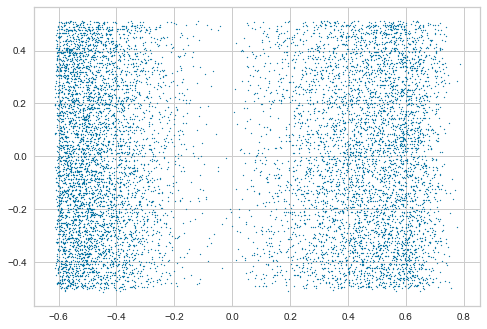

In [48]:
# Scatter 2 PCA components

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=1);

In [49]:
# Kmeans on 2 PCA components (obtained from above)

kmeans = KMeans(n_clusters=2) # 2 clusters only based on scatter of data above
kmeans.fit(X_pca[:,:2])
y_kmeans = kmeans.predict(X_pca[:,:2])  



In [50]:
# This shows cluster centers (total 4) based on 2 components

kmeans.cluster_centers_ 

array([[ 0.45721648, -0.00047784],
       [-0.4573994 ,  0.00047804]])

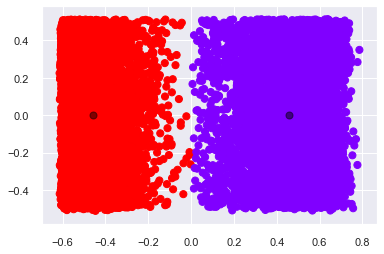

In [51]:
# Scatter PCA components with clusters (after kmeans)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='rainbow')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5);

## Hiearchical clustering

In [52]:
from sklearn.cluster import AgglomerativeClustering

In [64]:
groups = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

groups .fit_predict(X_all_ind)

array([0, 2, 3, ..., 2, 3, 3])

## Dendogram for number of clusters

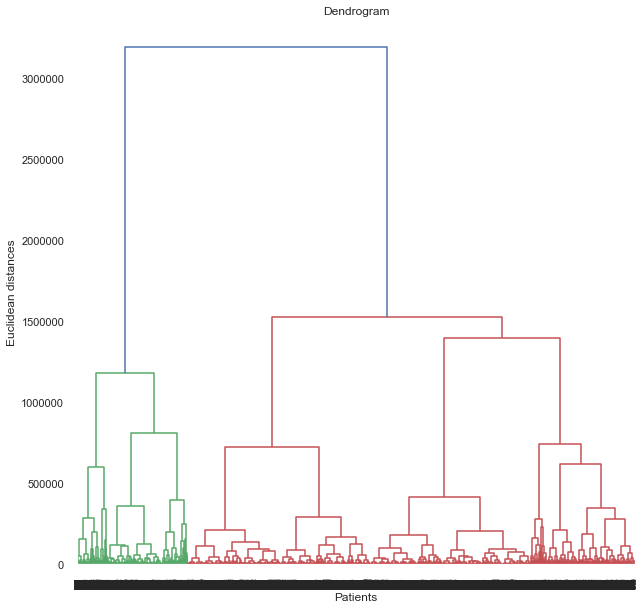

In [78]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X_all_ind, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Patients')
plt.ylabel('Euclidean distances')
plt.show()

### based on dendogram, the number of clusters should be 4

# 3. Market Basket

This section covers Market Basket Analysis

In [15]:
from mlxtend.frequent_patterns import apriori, association_rules


In [31]:
X_MB.head(3)
#X_MB.Complication_Risk.unique()

,ID,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma
0,0,1,0,0,1,1,0,1,1,1,0,1
1,1,1,0,1,0,0,0,0,0,0,1,0
2,2,1,0,1,0,1,0,0,0,0,0,0


In [33]:
# Apriori algorithm

frequent_itemsets = apriori(X_MB, min_support=0.07, use_colnames=True)

In [39]:
# Freq item sets

frequent_itemsets.head(7)

,support,itemsets
0,0.4090,(HighBlood)
1,0.1993,(Stroke)
2,0.7094,(Overweight)
3,0.3574,(Arthritis)
4,0.2738,(Diabetes)
5,0.3372,(Hyperlipidemia)
6,0.4114,(BackPain)


In [42]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(HighBlood),(Overweight),0.4090,0.7094,0.2960,0.723716,1.020181,0.005855,1.051818
1,(Stroke),(Overweight),0.1993,0.7094,0.1412,0.708480,0.998703,-0.000183,0.996843
2,(Arthritis),(Overweight),0.3574,0.7094,0.2544,0.711807,1.003394,0.000860,1.008354
3,(Diabetes),(Overweight),0.2738,0.7094,0.1927,0.703798,0.992104,-0.001534,0.981089
4,(Hyperlipidemia),(Overweight),0.3372,0.7094,0.2379,0.705516,0.994525,-0.001310,0.986811


In [43]:
# Get rules set

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(HighBlood),(Stroke),0.4090,0.1993,0.0830,0.202934,1.018234,0.001486,1.004559
1,(Stroke),(HighBlood),0.1993,0.4090,0.0830,0.416458,1.018234,0.001486,1.012780
2,(HighBlood),(Overweight),0.4090,0.7094,0.2960,0.723716,1.020181,0.005855,1.051818
3,(Overweight),(HighBlood),0.7094,0.4090,0.2960,0.417254,1.020181,0.005855,1.014164
4,(HighBlood),(Arthritis),0.4090,0.3574,0.1479,0.361614,1.011790,0.001723,1.006601
...,...,...,...,...,...,...,...,...,...
159,(Allergic_rhinitis),"(Anxiety, Overweight)",0.3941,0.2257,0.0921,0.233697,1.035432,0.003152,1.010436
160,"(Asthma, Reflux_esophagitis)",(Overweight),0.1193,0.7094,0.0847,0.709975,1.000810,0.000069,1.001982
161,"(Overweight, Reflux_esophagitis)",(Asthma),0.2906,0.2893,0.0847,0.291466,1.007487,0.000629,1.003057
162,(Asthma),"(Overweight, Reflux_esophagitis)",0.2893,0.2906,0.0847,0.292776,1.007487,0.000629,1.003076


In [35]:
# Filter rules set

rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
